8 10 0.3381030076550062
10 12 0.338353589298451
12 16 0.33806620344926314
16 24 0.33821033554952024
24 32 0.33808835281144406
[0.33816429775273693] [0.002114712312806583]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32
0.3381716858909491 5.971845615693256e-06


<ErrorbarContainer object of 3 artists>

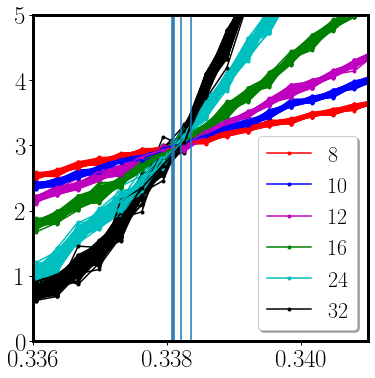

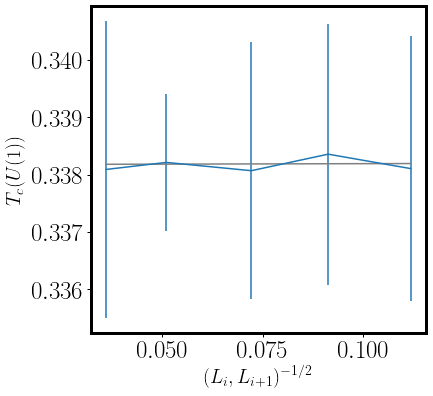

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit


plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

##############################
def linear_fit(x,a,b):
    return a*x +b

##############################

bare_Tc=[]
bare_Tc_err=[]
nu_list=[]
e=0
nu=0
h=1
rho=1
eta1=0
eta2=1
blow=0.33
bhigh=0.35
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(0.336, 0.341)
ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
betac_finitesize=np.asarray(betac_finitesize)
err_betac_finitesize=np.asarray(err_betac_finitesize)
a0=betac_finitesize[1]-betac_finitesize[0]
b0=betac_finitesize[0]
popt, pcov = curve_fit(linear_fit, pair_l , betac_finitesize, sigma=err_betac_finitesize, absolute_sigma=True, p0=(a0,b0))
print(popt[1], pcov[1,1])
ax2.plot(pair_l, linear_fit(pair_l,*popt), ls="-", c="gray" )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.3478773302949836
10 12 0.3480477648490116
12 16 0.34805887609527963
16 24 0.3480752806105079
24 32 0.3493228124627175
[0.33816429775273693, 0.34827641286250005] [0.002114712312806583, 0.0011962094214982154]
0.3502914981765786 6.033201797327468e-07 0.34827641286250005


<ErrorbarContainer object of 3 artists>

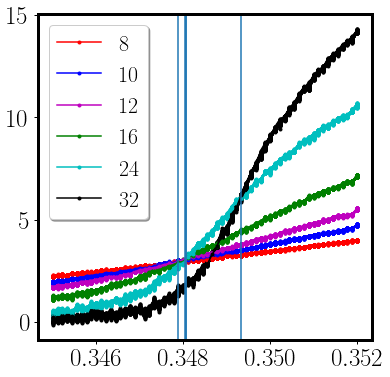

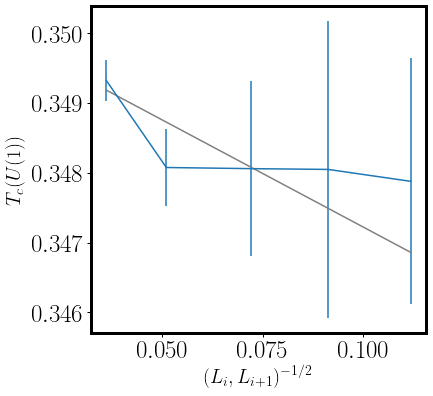

In [24]:
e=0
nu=0.2
h=1
rho=1
eta1=0
eta2=1
blow=0.345
bhigh=0.352
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    
betac_finitesize=np.asarray(betac_finitesize)
err_betac_finitesize=np.asarray(err_betac_finitesize)
a0=betac_finitesize[1]-betac_finitesize[0]
b0=betac_finitesize[0]
popt, pcov = curve_fit(linear_fit, pair_l , betac_finitesize, sigma=err_betac_finitesize, absolute_sigma=True, p0=(a0,b0))
print(popt[1], pcov[1,1], np.mean(betac_finitesize))
ax2.plot(pair_l, linear_fit(pair_l,*popt), ls="-", c="gray" )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.37659234609890513
10 12 0.37690053608321505
12 16 0.3772013720156366
16 24 0.37768272474437786
24 32 0.3768906969964743
[0.33816429775273693, 0.34827641286250005, 0.3770535351877218] [0.002114712312806583, 0.0011962094214982154, 0.000572293981911559]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

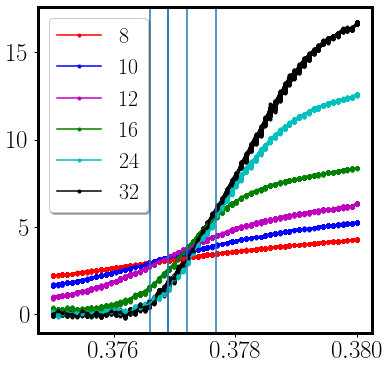

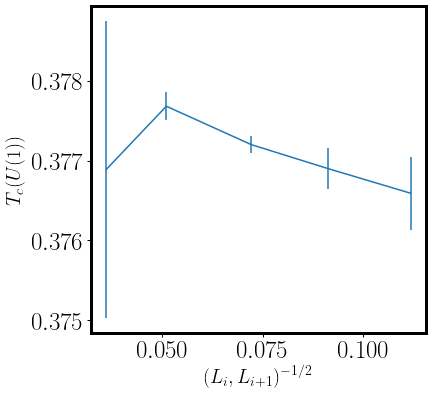

In [25]:
e=0
nu=0.4
h=1
rho=1
eta1=0
eta2=1
blow=0.375
bhigh=0.38
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.39577764671158877
10 12 0.3959148975045215
12 16 0.3961934310729365
16 24 0.39602081306471076
24 32 0.3950072221646235
[0.33816429775273693, 0.34827641286250005, 0.3770535351877218, 0.39578280210367617] [0.002114712312806583, 0.0011962094214982154, 0.000572293981911559, 0.0010466141832789736]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

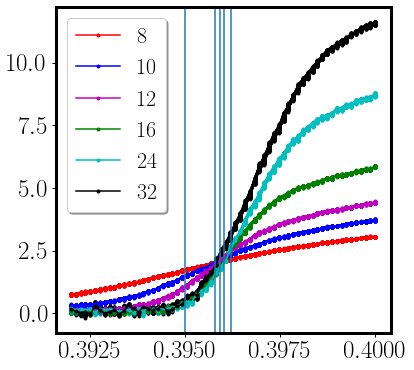

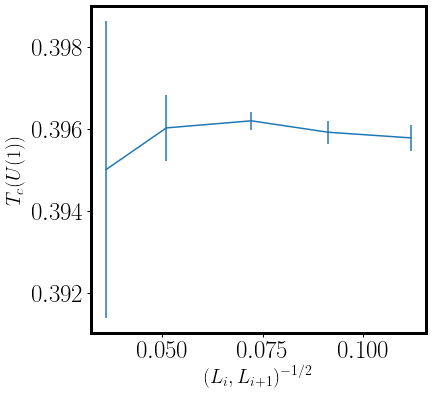

In [26]:
e=0
nu=0.5
h=1
rho=1
eta1=0
eta2=1
blow=0.392
bhigh=0.4
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.4009633120419309
10 12 0.40089876182170237
12 16 0.4008384657412789
16 24 0.400664561634306
24 32 0.3995779487703804
[0.33816429775273693, 0.34827641286250005, 0.3770535351877218, 0.39578280210367617, 0.40058861000191975] [0.002114712312806583, 0.0011962094214982154, 0.000572293981911559, 0.0010466141832789736, 0.0012665809727888473]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

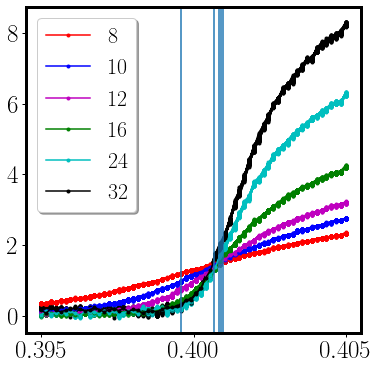

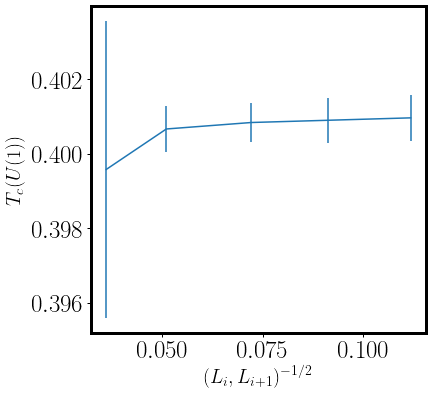

In [27]:
e=0
nu=0.525
h=1
rho=1
eta1=0
eta2=1
blow=0.395
bhigh=0.405
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.4089117166187586
10 12 0.40873795685951764
12 16 0.40851786109623456
16 24 0.40755701768834224
24 32 0.4071083049969609
[0.33816429775273693, 0.34827641286250005, 0.3770535351877218, 0.39578280210367617, 0.40058861000191975, 0.4081665714519628] [0.002114712312806583, 0.0011962094214982154, 0.000572293981911559, 0.0010466141832789736, 0.0012665809727888473, 0.0022126516969652927]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

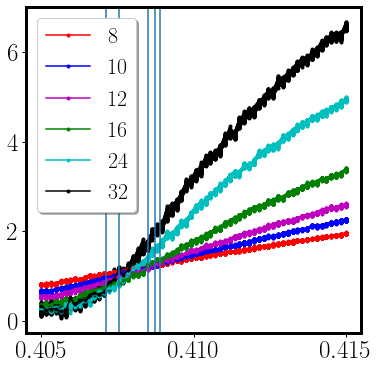

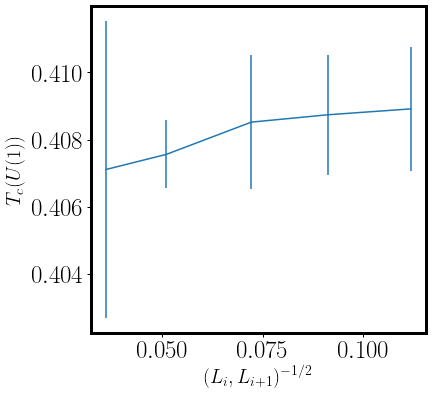

In [28]:
e=0
nu=0.55
h=1
rho=1
eta1=0
eta2=1
blow=0.405
bhigh=0.415
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.45090798463738396
10 12 0.45023992858048373
12 16 0.44817726704834343
16 24 0.4462866204219759
24 32 0.44429053494502285
[0.33816429775273693, 0.34827641286250005, 0.3770535351877218, 0.39578280210367617, 0.40058861000191975, 0.4081665714519628, 0.44798046712664197] [0.002114712312806583, 0.0011962094214982154, 0.000572293981911559, 0.0010466141832789736, 0.0012665809727888473, 0.0022126516969652927, 0.005473534000224699]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

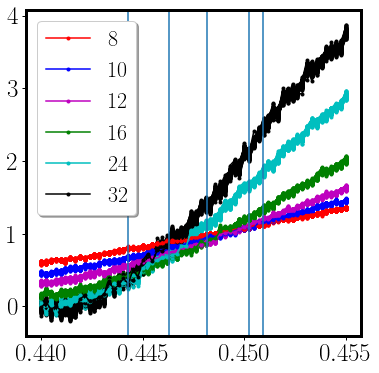

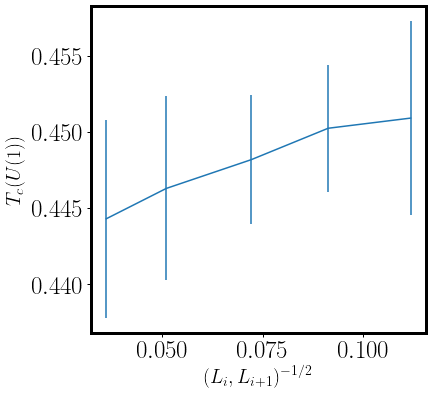

In [29]:
e=0
nu=0.6
h=1
rho=1
eta1=0
eta2=1
blow=0.44
bhigh=0.455
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

8 10 0.5293950355479936
10 12 0.5279953006274255
12 16 0.5254143862092061
16 24 0.5232428398600695
24 32 0.5216808337055988
[0.33816429775273693, 0.34827641286250005, 0.3770535351877218, 0.39578280210367617, 0.40058861000191975, 0.4081665714519628, 0.44798046712664197, 0.5255456791900587] [0.002114712312806583, 0.0011962094214982154, 0.000572293981911559, 0.0010466141832789736, 0.0012665809727888473, 0.0022126516969652927, 0.005473534000224699, 0.005851475766609872]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32


<ErrorbarContainer object of 3 artists>

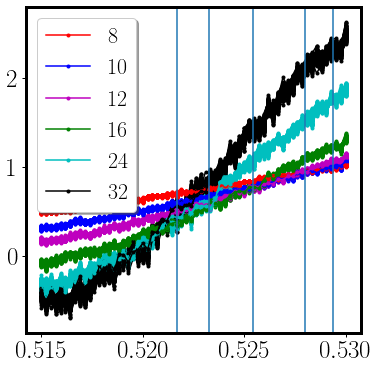

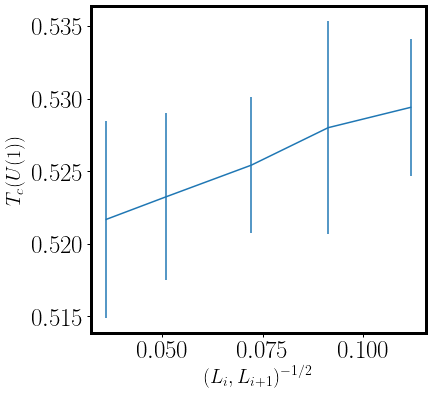

In [30]:
e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1
blow=0.515
bhigh=0.53
nMAX=30
nbeta=64

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init0" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            if( ((-np.where(Js_cross[n,:, l2]<= (Js_cross[n,:, l1]))[0][-1]) +nbeta) >1):
                index1=np.where(Js_cross[n,:, l2]<= (Js_cross[n,:, l1]))[0][-1]
                index2=index1+1
                x1= beta[index1]
                y1= Js_cross[n,index1, l1]
                x2= beta[index2] 
                y2=Js_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= Js_cross[n,index1, l2]
                y2=Js_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
                betac_cross[n,l2-1]=beta[nbeta-1]

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

nu_list.append(nu)
bare_Tc.append(np.mean(betac_finitesize))
bare_Tc_err.append(np.mean( err_betac_finitesize) )
print(bare_Tc, bare_Tc_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

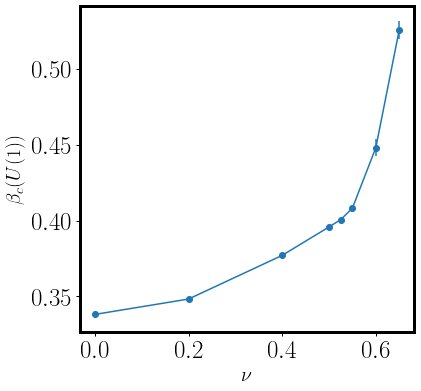

In [31]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xlabel(r"$\nu$")
ax2.set_ylabel(r"$\beta_c(U(1))$")
ax2.errorbar(nu_list,bare_Tc, yerr= bare_Tc_err, fmt="o-")

np.savetxt("%s/betac_U1_eta2%s.txt" %(folder_fig, eta2), (nu_list,bare_Tc, bare_Tc_err))